In [1]:
import numpy as np
import scipy.signal as signal
import netCDF4
import sys
import os

#-------------------------------------------------------------------------------
# Define all required sub-libraries, sub-routines, and sub-modules
#-------------------------------------------------------------------------------
from netCDF4 import Dataset
from math import pi

#-------------------------------------------------------------------------------
# Print message to screen
#-------------------------------------------------------------------------------
print "----------------------------------------------------------------------"
print " RUNNING: Script ROMS_EKE_sla.py"
print "----------------------------------------------------------------------"
print ""

################################################################################
#                                                                              #
#                            User Defined Variables                            #
#                                                                              #
infile1 = '/Volumes/Backup2/Data/USeast-age/fwdrun/part1/useast_his.nc'
infile2 = '/Volumes/Backup2/Data/USeast-age/fwdrun/part2/useast_his.nc'
infile3 = '/Volumes/Black_box/Data/USeast-age/output/clim/averages/'+\
          'mean_vels.nc'
#                                                                              #
################################################################################

#-------------------------------------------------------------------------------
# Open input and output datasets
#-------------------------------------------------------------------------------
indata1=Dataset(infile1,mode='r')
indata2=Dataset(infile2,mode='r')
indata3=Dataset(infile3,mode='r')

#-------------------------------------------------------------------------------
# Read grid variables
#-------------------------------------------------------------------------------
print 'Ingesting grid data from file %s ...' % (infile1)
mask = indata1.variables['mask_rho'][:]
lon   = indata1.variables['lon_rho' ][:]
lat   = indata1.variables['lat_rho' ][:]


----------------------------------------------------------------------
 RUNNING: Script ROMS_EKE_sla.py
----------------------------------------------------------------------

Ingesting grid data from file /Volumes/Backup2/Data/USeast-age/fwdrun/part1/useast_his.nc ...


In [2]:
#--------------------------------------------------------------------------
# Declare constants used for calculations
#--------------------------------------------------------------------------
DEG2RAD = (2*pi/360.0);
DEG2NM  = 60.0;
NM2KM   = 1.8520;    # Defined in Pond & Pickard p303.
g       = -9.81;

#--------------------------------------------------------------------------
# Calculate meridional distances (dy)
#--------------------------------------------------------------------------
latrad = (indata1.variables['lat_rho'][:,:])*DEG2RAD
dlon   =  indata1.variables['lon_rho'][1:482,:]-\
          indata1.variables['lon_rho'][0:481,:]
dlat   =  indata1.variables['lat_rho'][1:482,:]-\
          indata1.variables['lat_rho'][0:481,:]
dep    = np.cos((latrad[1:482,:]+latrad[0:481,:])/2.0 )*dlon;
dy     = np.sqrt(dep**2 + dlat**2)*DEG2NM*NM2KM*1000.0
fy     = (indata1.variables['f'][1:482,:]+\
          indata1.variables['f'][0:481,:])/2.0

#--------------------------------------------------------------------------
# Calculate zonal distances (dx)
#--------------------------------------------------------------------------
latrad = (indata1.variables['lat_rho'][:,:])*DEG2RAD
dlon   =  indata1.variables['lon_rho'][:,1:402]-\
          indata1.variables['lon_rho'][:,0:401]
dlat   =  indata1.variables['lat_rho'][:,1:402]-\
          indata1.variables['lat_rho'][:,0:401]
dep    = np.cos((latrad[:,1:402]+latrad[:,0:401])/2.0 )*dlon;
dx     = np.sqrt(dep**2 + dlat**2)*DEG2NM*NM2KM*1000.0
fx     = (indata1.variables['f'][:,1:402]+\
          indata1.variables['f'][:,0:401])/2.0


In [3]:
#--------------------------------------------------------------------------
# Declare 2d variables to be averaged
#--------------------------------------------------------------------------
M=len(indata1.dimensions[indata1.variables['zeta'].dimensions[1]])
N=len(indata1.dimensions[indata1.variables['zeta'].dimensions[2]])
eke       = np.zeros(shape=(M-1,N-1))

#--------------------------------------------------------------------------
# 6th Order Butterworth filter w cutoff frequency of 100 hrs @ 3 hrly data
#--------------------------------------------------------------------------
B,A=signal.butter(6,3/20,output='ba');


In [4]:
#------------------------------------------------------------------------
# Initialize some arrays
#------------------------------------------------------------------------
count=0
zeta1=np.zeros(shape=(2922*6,)) # Lower left  corner [i  ,j  ]


In [5]:
mask[150,250]

1.0

In [6]:
i=150
j=250

In [7]:
zeta1[0:2922*2]       =indata1.variables['zeta'][0:2922*2  ,i,j]
zeta1[2922*2-1:2922*6]=indata2.variables['zeta'][0:2922*4+1,i,j]


In [8]:
# For inline plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


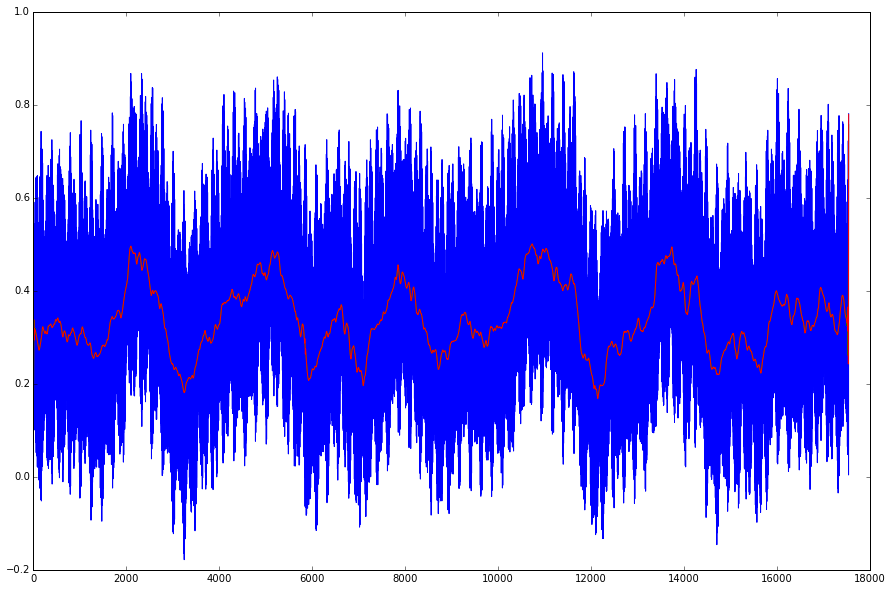

In [107]:
figsize(15,10)
plt.plot(zeta1)
plt.plot(zeta2f,c='g')
plt.plot(zeta1f,c='r')


In [105]:
zeta2f=signal.filtfilt(B,A,zeta1)


In [103]:
zeta1f[:10]

array([ 0.12955137,  0.18583925,  0.23731759,  0.27999752,  0.31131671,
        0.33044571,  0.33824723,  0.33692921,  0.32949865,  0.31915427])

In [83]:
A

array([ 1.        , -4.18238958,  7.49161108, -7.31359597,  4.08934993,
       -1.23852537,  0.15842763])

In [104]:
B,A=signal.butter(6,3/40.0,'low',False,'ba');

In [72]:
norm_pass = 0.1/(3/2)
norm_stop = 1.5*norm_pass
(N, Wn) = signal.buttord(wp=norm_pass, ws=norm_stop, gpass=2, gstop=30, analog=0)
(b, a) = signal.butter(N, Wn, btype='low', analog=0, output='ba')


In [108]:
100.0/24

4.166666666666667